In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
### Dataset Employee: https://www.kaggle.com/patelprashant/employee-attrition

Набор данных об увольнении и производительности сотрудников отдела кадров

**Education**
1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

**EnvironmentSatisfaction**
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

**JobInvolvement**
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

**JobSatisfaction**
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

**PerformanceRating**
1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

**RelationshipSatisfaction**
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

**WorkLifeBalance**
1 'Bad' 2 'Good' 3 'Better' 4 'Best'

In [2]:
data = pd.read_csv('Data/employee.csv')

# lets take only 200 rows as we are only going to visualize it
data = data.loc[:199,:]
print(data.shape)

(200, 35)


In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


---
### Bar Plot

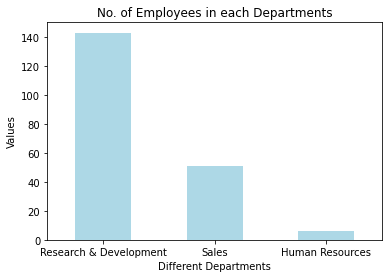

In [4]:
# analyzing the attribute Department

data['Department'].value_counts().plot(kind = 'bar', color = 'lightblue')
plt.ylabel('Values')
plt.xlabel('Different Departments')
plt.xticks(rotation = 360)
plt.title('No. of Employees in each Departments', fontsize =12)
plt.show()

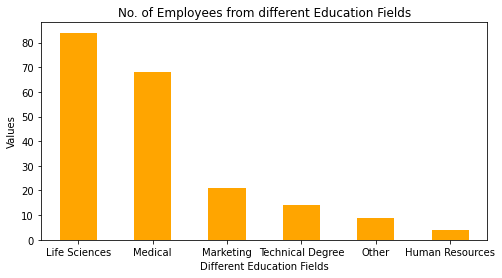

In [5]:
# analyzing the Education Field

plt.rcParams['figure.figsize'] = (8, 4)
data['EducationField'].value_counts().plot(kind = 'bar', color = 'orange')
plt.ylabel('Values')
plt.xlabel('Different Education Fields')
plt.xticks(rotation = 360)
plt.title('No. of Employees from different Education Fields', fontsize =12)
plt.show()

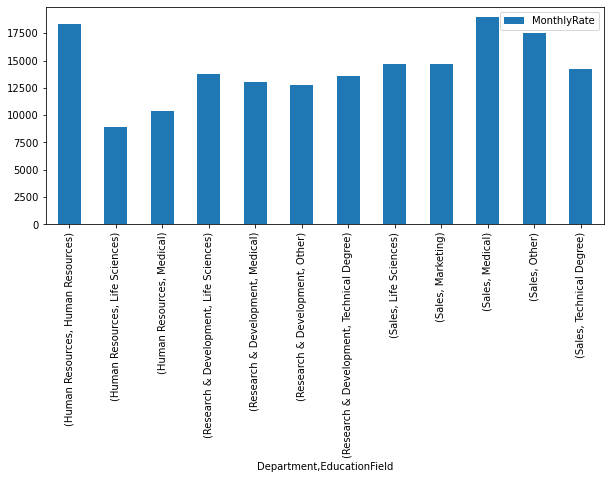

In [6]:
# lets plot Departments vs Monthly Rate

plt.rcParams['figure.figsize'] = (10, 4)
x = data.pivot_table(index = ['Department','EducationField'], values = ['MonthlyRate'], aggfunc = 'mean')
x.plot(kind = 'bar', stacked = False)
plt.xticks(rotation = 90)
plt.show()

In [7]:
x = pd.crosstab(index = data['Department'],
                columns = data['EducationField'],
                values = data['MonthlyRate'],
                aggfunc = 'mean')
x

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Department,,,,,,
Human Resources,18355.75,8916.000000,NaN,10425.000000,NaN,NaN
Research & Development,NaN,13771.687500,NaN,13053.540984,12780.375,13551.0
Sales,NaN,14644.684211,14645.952381,18956.833333,17519.000,14198.5


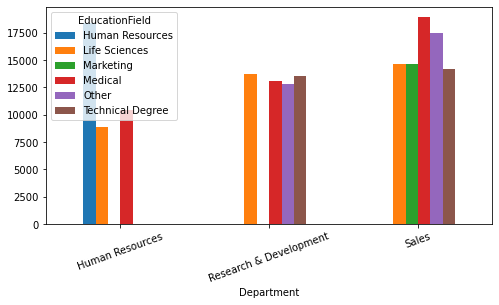

In [8]:
# Lets make a Grouped Bar Plot 
plt.rcParams['figure.figsize'] = (8, 4)
x.plot(kind = 'bar', stacked = False)
plt.xticks(rotation = 20)
plt.show()

---
### Scatter Plot

In [10]:
data = pd.read_csv('Data/employee.csv')

In [11]:
# lets check the documentation of scatter plot
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.
    
    s : float or array-like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* should not be a single nu

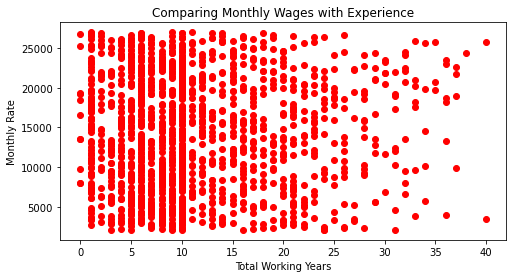

In [12]:
plt.scatter( data['TotalWorkingYears'],
            data['MonthlyRate'],
            color = 'red')

plt.ylabel('Monthly Rate')
plt.xlabel('Total Working Years')
plt.title('Comparing Monthly Wages with Experience')
plt.show()

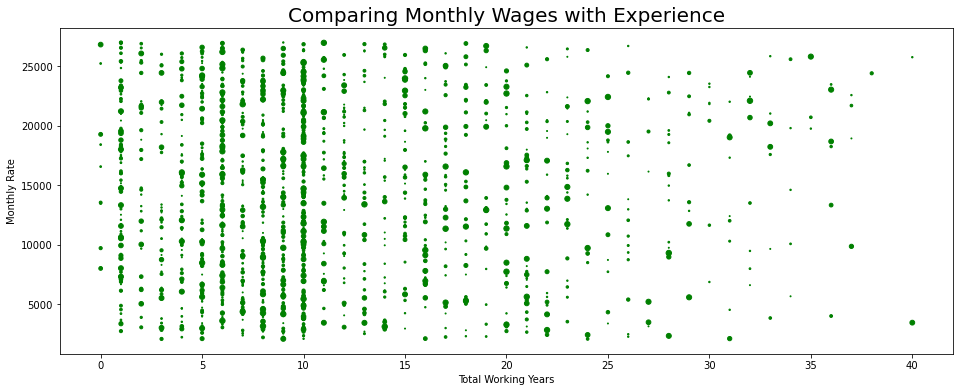

In [13]:
plt.rcParams['figure.figsize'] = (16, 6)

plt.scatter( data['TotalWorkingYears'],
            data['MonthlyRate'],
            s = data['DistanceFromHome'],
            color = 'green')

plt.ylabel('Monthly Rate')
plt.xlabel('Total Working Years')

plt.title('Comparing Monthly Wages with Experience', fontsize = 20)
plt.show()